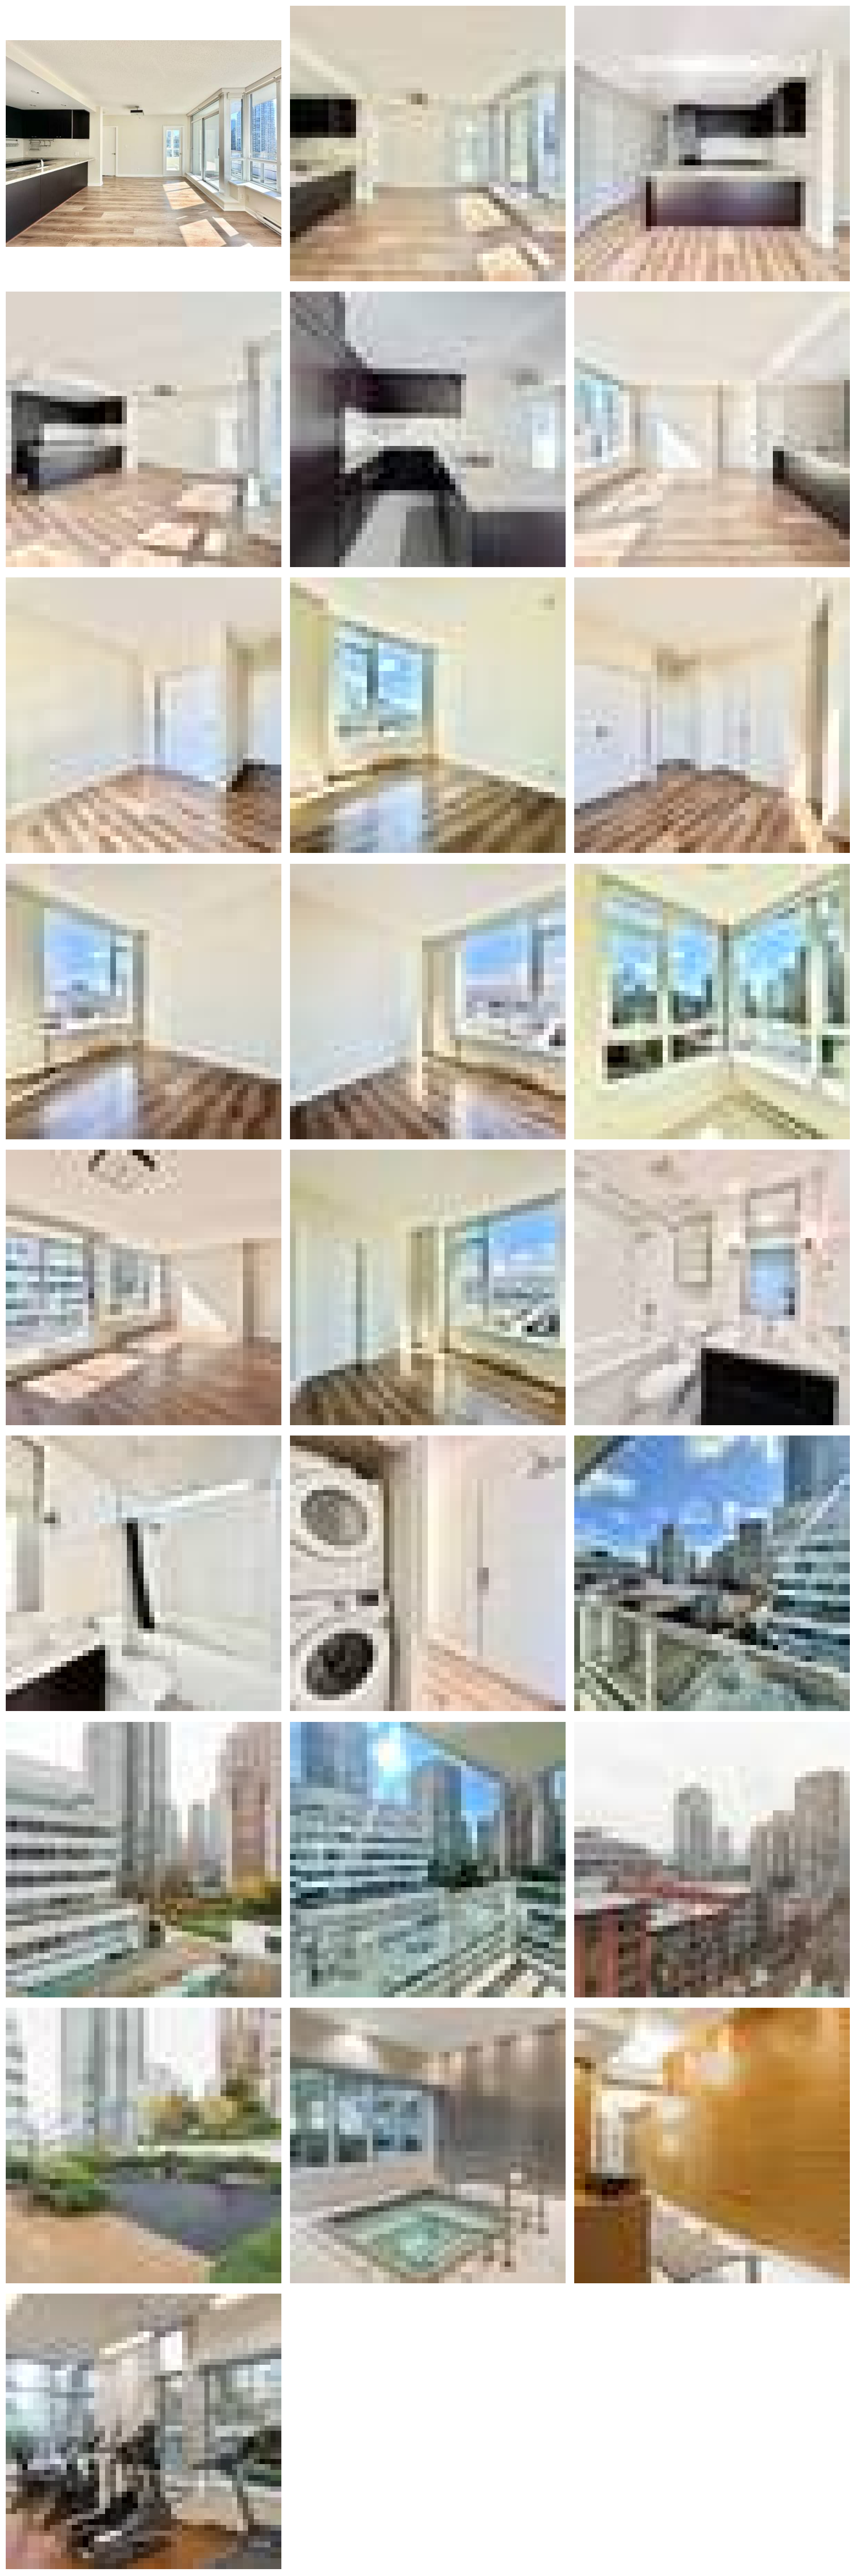

Title: Beautiful Unfurnished 2B2B Corner Unit @ DT VAN
Price: $3,200
Location: $3,200 / 2br - 871ft2 - Beautiful Unfurnished 2B2B Corner Unit @ DT VAN (VANCOUVER BC)
Bedrooms: 2BR
Bathrooms: 2Ba
Sqft: 871ft2
Link: https://vancouver.craigslist.org/rds/apa/d/vancouver-beautiful-unfurnished-2b2b/7802147586.html


In [4]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from io import BytesIO
import pandas as pd

# URL of the Craigslist page
url = 'https://vancouver.craigslist.org/rds/apa/d/vancouver-beautiful-unfurnished-2b2b/7802147586.html'

# Send a GET request to the page
response = requests.get(url)
soup = BeautifulSoup(response.content,'html.parser')
# Find all image URLs
image_tags = soup.find_all('img')
image_urls = [img['src'] for img in image_tags if 'src' in img.attrs]
# Download images and store them in a list
images = []
for img_url in image_urls:
    img_response = requests.get(img_url)
    img = Image.open(BytesIO(img_response.content))
    images.append(img)
# Calculate the number of rows and columns needed to display all images

num_images = len(images)
num_cols = 3
num_rows = num_images // num_cols + 1

# Create a figure and axis
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for img, ax in zip(images, axes):
    ax.imshow(img)
    ax.axis('off')
    
# Hide any empty subplots
for ax in axes[num_images:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

title_tag = soup.find('span', {'id': 'titletextonly'})
title = title_tag.text if title_tag else 'Title not found'

price_tag = soup.find('span', {'class': 'price'})
price = price_tag.text if price_tag else 'Price not found'

location_tag = soup.find('span', {'class': 'postingtitletext'})
location = location_tag.text.strip() if location_tag else 'Location not found'

housing_info = soup.find('span', {'class': 'attr important'})
if housing_info:
    br_info, ba_info = housing_info.text.strip().split('/')
    bedrooms = br_info.strip()
    bathrooms = ba_info.strip()
else:
    bedrooms = 'Bedrooms not found'
    bathrooms = 'Bathrooms not found'

bedrooms_tag = soup.find('span', {'class': 'shared-line-bubble'})
if bedrooms == 'Bedrooms not found' and bedrooms_tag:
    bedrooms = bedrooms_tag.text

bathrooms_tag = soup.find('span', {'class': 'shared-line-bubble'})
if bathrooms == 'Bathrooms not found' and bathrooms_tag:
    bathrooms = bathrooms_tag.text
    
sqft_tag = soup.find('span', {'class': 'housing'})
if sqft_tag:
    sqft_info = sqft_tag.text.strip().split('-')
    sqft = sqft_info[1].strip() if len(sqft_info) > 1 else 'Sqft not found'
else:
    sqft = 'Sqft not found'
    
link = url

print(f"Title: {title}")
print(f"Price: {price}")
print(f"Location: {location}")
print(f"Bedrooms: {bedrooms}")
print(f"Bathrooms: {bathrooms}")
print(f"Sqft: {sqft}")
print(f"Link: {link}")

